
<font size="8" color ="Brown"><center>
# Improved Interpolation
        
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">Interpolation plays an important role for motion
compensation with improved fractional pixel
accuracy. The more precise interpolated we get,
the smaller our prediction residual becomes, and
the more compression we get.<br>
How do we get improved and practical
interpolation?<br><br>
In **Computer Graphics** we have an analog
problem of interpolating samples, but there it is
samples given by a model or a designer, instead
of the pixel grid of our image. Hence it makes
sense to take a look at the approaches in
Computer Graphics:<br>
    
![Lecture14-1.PNG](Img-Lecture14\Lecture14-1.PNG)
<br>
Parallel to Nyquist-Sampling Theorem for
reconstruction:<br>
-  Interpolation of samples.<br>
-  Tells us how to do the interpolation:<br>

With an ideal low pass filter, whose upper cutoff
frequency is half the sampling rate (for an interpolation
or upsampling factor of 2). The samples are our control
points (the samples in above picture).<br>
Nyquist Reconstruction (or interpolation): Our samples
correspond to our control points (with zeros in between).
The result of their low pass filterings is our interpolation.<br>

![Lecture14-2.PNG](Img-Lecture14\Lecture14-2.PNG)
<br>


Nyquist resonstruction assures that there are no
frequency components above the Nyquist frequency,
hence<br>
→ minimum frequency of change, maximally
smooth interpolated curve. The sinc function<br>
<br>
$$sinc(t)=\frac{sin(\pi.t)}{\pi.t}$$

is the impulse response of our ideal low pass filter as
interpolation function: <br><br>
Low pass filtering: **Convolution** with this
function<br>

![Lecture14-3.PNG](Img-Lecture14\Lecture14-3.PNG)
<br>

We assume that our samples are on **integer sample
points**. The interpolation function of the other samples
have a zero there, hence the interpolated curve has **no 
influence of the other samples** there, and the curve
will go **through the sample values**. The original
sampling points are maintained after the interpolation,
which is what we want. This can be seen in the
following.<br>
In continuous space or time we can write our sequence
of samples as sequence of Dirac pulse multiplied by the
sample values,$$\sum_{n=0}^{\infty}x(n)\delta(t-n)$$


Filtering is a convolution of our samples with the Sinc
function. Continuous time convolution is (e.g. with a(t)
our sample sequence and b(t) our ideal low pass filter
impulse response) <br>

![Lecture14-4.PNG](Img-Lecture14\Lecture14-4.PNG)
<br><br>
![Lecture14-5.PNG](Img-Lecture14\Lecture14-5.PNG)

<br><br>

![Lecture14-6.PNG](Img-Lecture14\Lecture14-6.PNG)
Sinc function is infinite polynomial, infinitely
continuously differentiable<br>
→ interpolated curve is infinitely differentiable!<br>
→ Better than, for example Cubic splines<br>
(Computer Graphics), which are continuously
differentiable only until the 2nd derivative.<br><br>
Problem: sinc function is infinitely long, not so
practical.<br>
Alternative options for interpolation filter:
convolution of our samples with the so-called
"Box function" $h_1(t)$ as a basis function.
<br>
![Lecture14-7.PNG](Img-Lecture14\Lecture14-7.PNG)
→ No continuity, problem because we have
mostly smooth intensity gradients in images.
Another way to preserve the continuity:
**Linear interpolation:**<br>
Basis function is the Box function convolved with
itself.<br>

![Lecture14-8.PNG](Img-Lecture14\Lecture14-8.PNG)
<br ><br>

$$h_2(t)=h_1(t)*h_1(t)$$
Interpolation with this basis function:
<br>

![Lecture14-9.PNG](Img-Lecture14\Lecture14-9.PNG)


<br>

Observe: After doing the convolution, we obtain
an increasing and a decreasing part for each to
be interpolated interval, as can be seen in above
picture. Each interval between two sampling
points contains two functions, the rising and the
falling slope of our basis function.<br>
We can write this basis function as **two** linear
functions or **polynomials of 1st order** of a local
variable u, which varies between 0 and 1 in this
interval between two neighboring sampling
points. For the **rising part** we get,
$$Q_1(u)=u$$
for the **falling part** we get,
$$Q_2(u)=1-u$$
Let the sample value at the lower end of the
interval be $f (0)$ and at the upper end be $f (1)$.
Then we can linearly **interpolate** the in-between
value at point u as

$$f (u)=f (0)⋅Q_2(u)+f (1)⋅Q_1(u)$$
<br><center>or</center><br>
$$f (u)=f (0)⋅(1−u)+u⋅f (1)$$
<br>

</font></p>    

<p style="line-height:1.5">
<font size="6">**Observe:** This **sum results from the
convolution** of the sampling points with the
basis function.<br>
**Example:** We have 2 neighboring pixels,
$f (0)=10$, $f (1)=12$ . What is the sample right in
the middle, using linear interpolation?<br>
Answer: We use our interpolation formula with
u=0.5,<br>

$$f (u)=f (0)⋅(1−u)+u⋅f (1)=10 ⋅ (1−u)+u⋅12=$$
$$=10⋅0.5+0.5⋅12=11$$

**Observe:** The convolution in space or time is a
**multiplication** in the frequency domain. Hence
a convolution of two box functions becomes a
**squared sinc** function in the frequency
domain!<br><br>
Note: basic function is 0 for the other samples
→ Interpolated curve goes through our samples.
→ C0 continuity, but no C1 continuity of the first
derivative.<br><br>
→ Next step:<br>
$$h_4(t)=h_2(t)∗h_2(t)=h_1(t)∗h_1(t)∗h_1(t)∗h_1(t)$$
<br><br>→ cubic B-Spline<br><br>
**Observe:** In the frequency domain, this B-Spline
is a sinc function to the $4^{th}$ power! ($sinc^4$)<br>
(The “B” is for “Basis”)<br>
**Example:** We compute the discrete B-Spline
basis function using convolution with
Python, by discretizing each unit interval
into 10 steps:<br>
</font></p> 

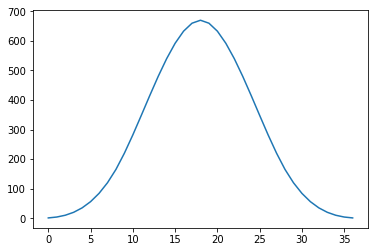

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
h1=np.ones(10)
h2=sig.convolve(h1,h1)
h4=sig.convolve(h2,h2)
plt.plot(h4)
plt.show()


<p style="line-height:1.5">
<font size="6">

**Observe:** We now have **4 unit intervals**
(between the sample points, in the plot at
multiples of 10). Each unit interval will have its
own polynomial,$ Q_1(u),...,Q_4(u)$ , as depicted in
above plot.<br>
Observe that in this way we get a very compact
support, which means our impulse response is
quite short (length only from 0 to 4), and it can
be represented by polynomials $Q_i(u)$ of third
order. Both makes it quite efficient for an
implementation, which is important for video
coding purposes. The **drawback** is now that the
B-Spline does not go through 0 at the other
samples (at positions 1 and 3), such that an
    interpolation with a simple convolution **will not
go through the original sampling
points/values**, which is not good. To fix this, we
can **pre-process** the original signal (image) first,
such that the **original samples** are again
obtained **after the convolution** with the B-Splines,
as we will see.<br>
We start with the $4^{th}$ derivative, because it is
easy to compute, and then we integrate 4 times,
to obtain the polynomial functions $Q_i$ itself.<br><br>
We can use this convolution for our interpolation,
but this only produces interpolated values on a 
fixed grid between the sample points. If we want
to have an interpolated value at an arbitrary
position $u$ between 2 sample points, we have to
find the polynomials $Q_1(u),...,Q_4(u) .$<br>
How do we get them?<br>
→ By observing the derivatives!
Derivation rule:<br>
    $$\frac{d}{dt} (h_1(t)∗h_1(t))=\frac{d}{dt} h_1(t)∗h_1(t)$$
because
$$\frac{d}{dt}\int a(u)⋅b(t−u)du=\int a(u)\frac {d}{dt} b(t−u)du$$
$$=a(t)∗\frac {d}{dt}⋅b(t)$$
<br><br>
→ 4th Derivation of the B-splines:<br>
$$\frac {d^4}{dt^4}h_4(t)=\frac{d}{dt} h_1(t)∗\frac{d}{dt} h_1(t)∗\frac{d}{dt} h_1(t)∗\frac {d}{dt} h_1(t)$$
$$\frac {d}{dt} h1(t)=\delta (t)−\delta(t−1)$$
<br>
→$\frac{d^4}{dt^4}h_4(t)=\delta(t)−4\delta(t−1)+6 \delta(t−2)−4 \delta(t−3)+\delta(t−4)$

<br><br>
(using $\delta(x−x_0)∗\delta(x−x_1)=\delta(x−x_0−x_1) $)


<br><br>Computation of these coefficients by using Python:<br>





</font></p> 

In [3]:
import numpy as np
import scipy.signal as sig
#the 2 diracs of the derivative of the box function:

dh=np.array([1,-1]) 
cdh=sig.convolve(dh,dh)
print("cdh= ",cdh )
 
#4 derivatives of box function convolved:
ccdh=sig.convolve(cdh,cdh)
print("ccdh= ",ccdh)

cdh=  [ 1 -2  1]
ccdh=  [ 1 -4  6 -4  1]


<p style="line-height:1.5">
<font size="6">We obtain the third derivative of our spline by
integrating the $4^{th}$ derivative (without integration
constant),<br>
$$\frac {d^3}{dt^ 3}=\int(\delta(t)−4 \delta(t−1)+6 \delta(t−2)−4 \delta(t−3)+\delta(t−4))dt $$
    
This is a piecewise constant step function<br>

![Lecture14-10.PNG](Img-Lecture14\Lecture14-10.PNG)

Now we want to obtain the polynomials
$Q_1(u), ...,Q_4(u)$ with the local variable $u$. We
start with $Q_1(u)$ .<br> 
$$\frac{d^3}{dt^3} Q_1(u)=1$$
<br>
The second derivative of $Q_1(u)$ is the integral of
the third derivative,<br>
$$\frac {d^2}{du^2} Q_1(u)=\int 1du=u $$
next more integration,<br>
$$\frac {d}{du} Q_1(u)=\int u du=\frac{u^2}{2},$$

<br>
$$Q_1(u)=\frac{\int u^2}{2}du=\frac{u^3}{6}$$

<br><br><br><br>
For $Q_2(u)$ we also need conditions for continuity
for the second and first derivatives, and the
function value, where $Q_1(u)$ and $Q_2(u)$ touch,
at u=1 for the first interval with $Q_1(u)$ and
u=0 for the second interval with $Q_2(u)$ .
$$\frac {d^3}{dt^3}Q_2(u)=−3$$
<br>
$$\frac {d^2}{dt^ 2} Q_2(u)=−3u+c_2$$
To determine $c_2$ we need the values of the
second derivatives identical at the upper end of
the lower interval ( u=1 ) and the lower end of
the upper interval ( u=0 ), for continuity of the
second derivative,<br>

$$\frac {d^2}{du^2} Q_1(u=1)=\frac {d^2}{dt^2} Q_2(u=0)$$
hence we get<br>
$$1=−3⋅0+c_2$$
$$→c_2=1$$
$$and$$
$$\frac {d^2}{dt ^2} Q_2(u)=−3u+1$$

to continue integration, with integration constant
$c_1$,
$$\frac {d}{dt} Q_2(u)=\frac{−3}{2}u^2+u+c_1$$
Continuity of the first derivative,
$$\frac{d}{du} Q_1(u=1)=\frac{d}{dt} Q_2(u=0)$$
we get
$$\frac{1}{2}=c_1$$
hence
$$\frac{d}{dt} Q_2(u)=\frac{−3}{2}u^2+u+\frac{1}{2}$$
continue integration,
$$ Q_2(u)= \frac{−1}{2}u^3+\frac {u^2}{2}+\frac {u}{2}+c_0$$
We need the contunuity of the function values,
$$Q_1(u=1)=Q_2(u=0)$$
we get
$$\frac{1}{6}=c_0$$
hence we get
$$Q_2(u)=\frac{−1}{2}u^3+\frac{u^2}{2}+\frac{u}{2}+\frac{1}{6}$$
<br><br><br>
For the upper two intervals: mirror the lower
polynomials by replacing u by 1−u !
We do that by using an open source symbolic
mathematics package called **“Python Sympy”**,<br><br><br>
$Q_3(u) = Q_2(1-u) $
</font></p> 

In [4]:
from sympy import ratsimp
from sympy import *
u= symbols('u')
3*u
a=1/6*(-3*(1-u)**3+3*(1-u)**2+3*(1-u)+1)
print(a)
print(ratsimp(a))



-0.5*u - 0.5*(-u + 1)**3 + 0.5*(-u + 1)**2 + 0.666666666666667
0.5*u**3 - 1.0*u**2 + 0.666666666666667


<p style="line-height:1.5">
<font size="6"><br>$Q_4(u) = Q_1(1-u) $

</font></p> 

In [5]:
from sympy import *
u= symbols('u')
b=1/6*((1-u)**3)

print(b)
print(ratsimp(b))


0.166666666666667*(-u + 1)**3
-0.166666666666667*u**3 + 0.5*u**2 - 0.5*u + 0.166666666666667


<p style="line-height:1.5">
<font size="6">**Together:**
    
$$Q_1(u)=1/6 u^3$$ 
$$Q_2(u)=1/6(−3 u^3+3u^2+3 u+1)$$

$$Q_3(u)=1/6(3u^3−6u^2+4) ;$$
$$Q_4(u)=1/6(−u^3+3u^2−3u+1)$$
We now can also write our spline function $h_4(t)$
as
<br>
$\begin{equation}
 h_4(t)=\begin{cases}Q_1(t) & \text{for 0≤t≤1}\\
Q_2(t−1)  & \text{for 1≤t≤2}\\
Q_3(t−2)  & \text{for 2≤t≤3}\\
Q_4(t−3)  & \text{for 3≤t≤4}\end{cases}       
\end{equation}
$
$$(1)$$
<br><br>
Hence our convolution of our samples f(n) with
the spline function $h_4(t)$ for interpolation
becomes<br>
$$f (t)=\sum_{n} f (n)h_4(t+2−n)$$
Since the spline function $h_4(n)$ has its maximum
at t=2 , we shift it accordingly so that it is
centered at t=n . Now we can rewrite the
continuous time variable t as the sum of the
lower integer index $n_0$
 plus the float offset $u$
on the unit interval, $t=n_0+u$ ,
$$f (n_0+u)=\sum_{n}f (n)h_4(n_0+u+2−n)$$
Since the spline function is zero below argument
0 and above 4, we can limit the sum to this
range,<br>
$$f (n_0+u)= \sum_{n=n_0−1}^{n_0+2}f (n)h_4(n_0+u+2−n)$$
Since we can write the spline function as in eq.
(4) with the four polynomials, we can rewrite the
sum as<br>

$
f (n_0+u)=f (n_0−1)⋅Q_4(u)+f (n_0)⋅Q_3(u)+f (n_0+1)⋅Q_2(u)+f (n_0+2)⋅Q_1(u)$
<br>or<br><br>
$$
f (n_0+u)= \sum_{n=0}^{3}f (n_0−1−n)⋅Q_{4−n}(u)$$
$$(2)$$
We see that we get the weighted sum of the 4
spline polynomials, each weighted by the
corresponding sample value.<br><br>
**Example:**
Take the sample points $f (−1)=1$ , $f (0)=2$ ,
$f (1)=3$ , $f (2)=4$ . We assume the other
samples values to be zero. This is shown in the
following picture,<br>

![Lecture14-11.PNG](Img-Lecture14\Lecture14-11.PNG)


<br><br>
The blue peaks are the original sample values,
the green and red lines are the weighted and
shifted B-Spline functions, the long red line is the
sum of them.<br>
We want to interpolate a value at position
$0≤u≤1$ in the unit interval between sample
points $f(0)$ and $f(1)$. We see that the **sample
points at both ends of this interval** are
connected to the **peaks of the spline** functions
(polynomials $Q_3(u)$ and $Q_2(u)$ ), so they have
the most influence on the interpolated value, as
expected. The 2 neighboring samples behind
them still have some influence on the
interpolated value, but only via the tails of the
spline function, $Q_1(u)$ and $Q_4(u)$ .
Hence the considered to be interpolated interval
has contributions from all 4 polynomials, which
appear weighted by their sample values, and add
up, as in this formula, which is eq. (2) with n_0=0
$$f (u)=\sum_{n=0}^{3}f (n−1)⋅Q_{4−n}(u)$$
Plot in python:
<br><br>

</font></p> 

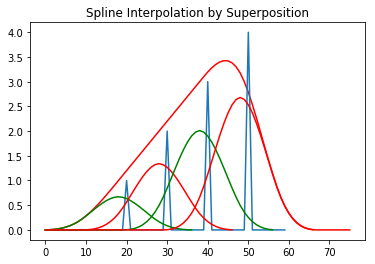

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
xu=np.zeros(40)
xu[0:40:10]=np.arange(1,5)

h1=np.ones(10)
h2=sig.convolve(h1,h1)/10 
h4=sig.convolve(h2,h2)/10
plt.plot(sig.convolve(xu,h4),'r')
plt.plot(np.concatenate((np.zeros(20),xu)))
plt.plot(1*h4,'g')
plt.plot(np.concatenate((np.zeros(10),2*h4) ),'r')
plt.plot(np.concatenate((np.zeros(20),3*h4)),'g')
plt.plot(np.concatenate((np.zeros(30),4*h4)),'r')
plt.title('Spline Interpolation by Superposition') 
plt.show()

<p style="line-height:1.5">
<font size="6">We can see that our B-Spline has the value 1/6 at
sample position 1 and 3 ($Q_1(1)=Q_2(0)=Q_3(1)=Q_4(0)=1/6 $) and it has the value of 4/6 at its center at sample position 2 $(Q_2(1)=Q_3(0)=4/6 )$. Hence the centered sample
will be multiplied (after convolution) with the
factor of 4/6, and the 2 neighboring samples with
1/6.<br>
This is also illustrated in the following picture 
   
   ![Lecture14-12.PNG](Img-Lecture14\Lecture14-12.PNG) 
    
(Made with python)<br>
Here you can also see: If we have a constant
sequence $x(n)=k$, then the interpolation on the
integer grid values n are:<br>
$$1/6⋅x(n−1)+4/6⋅x(n)+1/6⋅x(n+1)=(4/6+1/6+1/6)⋅k=k$$
So in this case the interpolation does indeed go
through the original sample values! This is
different for other examples:<br>
The interpolation of the sequence 1,2,3,4,0 with
splines as an example can be seen in this
picture:<br>

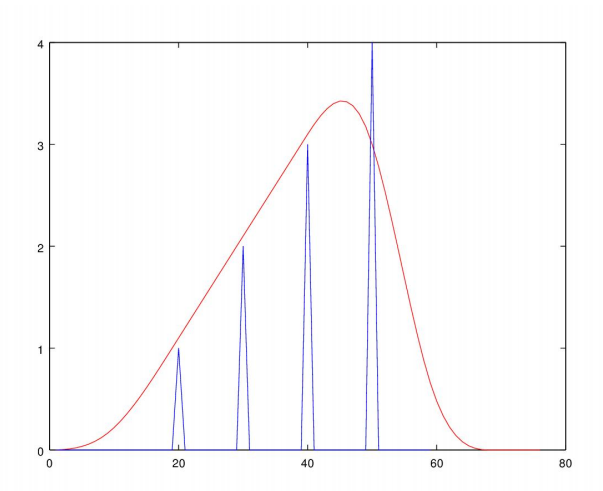
<br>
Obtained with:
<br>
```import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
xu=np.zeros(40)
xu[0:40:10]=np.arange(1,5)
h1=np.ones(10)
h2=sig.convolve(h1,h1)/10 
h4=sig.convolve(h2,h2)/10
plt.plot(sig.convolve(xu,h4),'r')
plt.plot(np.concatenate((np.zeros(20),xu)))
```
<br>
(We need a shift by 2 intervals, because the
spline function becomes maximal at t=2)
Here we have an interpolated grid of $1/10^{th}$ of a
pixel. We can also see that the interpolation
**does not go through the original pixel
values**, even though it is a nice and smooth
interpolation.<br>
How do we obtain a spline interpolation **through
the original pixels?** To see that, we first need
to analyse what happens with the original pixels
when we interpolate with the B-Spline.
Assume we already have a **pre-processing** of
our original image, which produces the pixel
values c(n) out of our image pixels x(n). The
question is, how do we produce the c(n) such
that the original pixel values x(n) are maintained
**after** the spline interpolation.<br><br>
We would like to have the original, which means
we would like to have the following:<br>
$$x(n)=1/6⋅c(n−1)+4/6⋅c(n)+1/6⋅c(n+1)$$
<br>
Here the factor 1/6 comes from the spline value
at the neighboring positions 1 and 3, and the
factor 4/6 comes from the spline value at its
center position 2.<br>
c comes from our pre-processed or
“compensated” image (pre-processing with some
filtering operation). So here we just look at the
integer pixel positions.<br>
Observe that this condition has to hold for all
inter values of n! How do we obtain c(n)?<br>

We need to apply the z-transform as a tool,
because it is made for such recursive equations.
Delays or advances can be formulated as
multiplications with $z^{-1}$ or with $z$.<br>
The above equation in the z-domain is:<br>
$$X(z)=1/6⋅z^{−1}C(z)+4/6⋅C(z)+1/6⋅z⋅C(z)$$
This can be re-written as:<br>
$$X (z)=C(z)⋅(1/6⋅z^{−1}+4/6+1/6⋅z)$$
and we obtain following expression for C(z):
$$C(z)=\frac{X (z)}{1/6⋅z^{-1}+4/6+1/6⋅z}$$
$$(1)$$
Now we can see that we obtain an IIR filter for
the generation of C(z) or c(n)!<br>
We can re-write the denominator polynomial of
(1) as the product of 2 simpler polynomials using
its roots.<br>

$$C(z)=\frac{X (z)}{1/6⋅z^{−1}+4/6+1/6⋅z}=\frac{X(z)}{1/6 z(z^{−2}+4 z^{−1}+1)}$$
We can compute its roots using python:

</font></p> 

In [7]:
np.roots([1,4,1])

array([-3.73205081, -0.26794919])

<p style="line-height:1.5">
<font size="6">Hence we get<br>
$$\frac{X (z)}
{1/6 z⋅(1−z_1⋅z^{−1})(1−z _2⋅z^{−1})}
=
\frac{X (z)}{1/6⋅z_2⋅(1−z_1⋅z^{−1})(z_2^{−1}z−1)}$$
    <br>
with $z_1=−0.26795$ and $z_2=−3.73205=1/z_1$
Observe that pole $z_2$ would result in an
instability. Observe that $1/z^2=z_1$ . We can
rewrite our desired compensation filter C(z) as
$$C(z)=−6⋅z_1\frac{X (z)}{(1−z_1⋅z^{−1})(1−z_1⋅z)}$$
Here we obtain one causal and one anti-causal
pole at $z_1=−0.26795$ .<br>
Note that we have a non-causal part z in our 
equation for c(n). How do we implement it? In
images we can solve this problem by
separating a causal and an anti-causal
filter, and then apply the anti-causal filter
backwards over our image, as shown in following
images.<br>
The first, causal part, is<br>
$$P(z)=\frac{X (z)}{(1−z_1⋅z^{−1})}$$
For that, we filter along the causal direction,
from left to rigth or from up to down, and
generate the intermediate signal p(n), with an IIR
filter with pole at $z_1$:<br>
  
![Lecture14-14.PNG](Img-Lecture14\Lecture14-14.PNG)
<br>

Its transfer function in the z-domain hence
becomes:<br>
$$P(z)= X (z)+ z_1⋅z^{−1}⋅P(z)$$
$$P(z)(1−z_1⋅z^−1)= X (z)$$

$$\frac{P(z)}{X (z)}=\frac{1}{1−z_1⋅z^{−1}}$$
Which is indeed our desired transfer function. We
see that it has indeed a pole at position $z=z_1$.
This now represents “one half” of our
compensation filter.<br>
Then we apply the second part, filter the
intermediate signal p(n) in the remaining **anticausal
direction, from right to left or from
down to up**,<br>
$$C(z)=\frac{−6⋅z_1 P(z)}{(1−z_1⋅z)}$$
We can implement it with the following structure,<br>
$$c(n)=−6z_1⋅p(n)+z_1⋅c(n+1)$$


![Lecture14-15.PNG](Img-Lecture14\Lecture14-15.PNG)
<br>

Its transfer function becomes (using again the z-transform):<br>
$$C(z)=−6 z_1 P(z)+z_1⋅z⋅C(z)$$
$$C(z)⋅(1−z_1⋅z)=−6 z_1 P(z)$$
<br>$$\frac{C(z)}{P(z)}=\frac{−6 z_1}{1−z_1⋅z}$$
<br>
Which is indeed our desired transfer function.
So the total structure is like in the following
diagram,<br>

![Lecture14-17.PNG](Img-Lecture14\Lecture14-17.PNG)

This is exactly what the HHI proposal is:
$$p(n)=x(n)+z_1⋅p(n−1)$$
$$c(n)=z_1⋅c(n+1)−6 z_1⋅p(n)$$
where $z_1 = -0.26795$, and where the resulting
c(n) are used for the spline interpolation (p(n) is
the result of the causal filter part).<br>
The resulting system is here:<br>
    
<br>

![Lecture14-18.PNG](Img-Lecture14\Lecture14-18.PNG)
    <br>
The block IIR filter generates the c's, and the FIR
filter is the spline interpolator. “In-Loop
processing” is anti-blocking filtering and similar.<br><br>
(From: 28th Picture Coding Symposium, PCS2010, December 8-
10, 2010, Nagoya, Japan,<br>
“FRACTIONAL-SAMPLE MOTION COMPENSATION
USING GENERALIZED INTERPOLATION”<br>
Haricharan Lakshman, Benjamin Bross, Heiko Schwarz, and
Thomas Wiegand)    <br><br>
    
</font></p> 


<font size="8" color ="Brown"><center>
# Python Example
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">As the signal we again take a ramp function, as
in the previous example:<br>


```    x = np.array([0,0,1,2,3,4,0,0])


```
<br>we compute the signal from causal filtering as
<br>
 ```
z1=-0.26795
p=lfilter( [1.],[1., -z1], x,axis=0)
 ```
 <br>
We compute the anti-causal filtering by using
“fliplr” at the input and output of our filter
operation, to reverse the filter direction,
<br>
```
c=-6*z1*np.fliplr([lfilter([1.],[1.,-z1], (p[::-1]))])[0];
h1=np.ones((100));
h2=sig.convolve(h1,h1)/100;
h4=sig.convolve(h2,h2)/100;

print(len(h4))


```
<br>
We compute our B-Spline basis function with 100
sampling points for each unit interval,<br>
The length of only 397 instead of 400 samples
shows that this is only a more or less unprecise
approximation of the B-Spline basis function, and
for the reason of increasing accuracy we went to
100 samples per unit interval, instead of just 10
in the previous example.<br>
Now we can compute the interpolated curve from
the upsampled c,<br>
```
c_upsampled=np.zeros(100*len(c))
c_upsampled[::100]=c
xi=lfilter(h4,1,c_upsampled);

plt.plot(xi,color='blue');
# define xu
xu=np.zeros((np.shape(cupsampled)))
xu[::100]=x
xu=np.concatenate((np.zeros(200),xu))
plt.plot(xu,color='red')

```
</font></p>    

<p style="line-height:1.5">
<font size="6"> 


![Lecture14-19.PNG](Img-Lecture14\Lecture14-19.PNG)


</font></p>  

<p style="line-height:1.5">
<font size="6">



We can see that the interpolated curve (blue)
indeed goes through the original samples (red) at
full 100's, up to the accuracy of our
approximated spline function!
</font></p>  

397


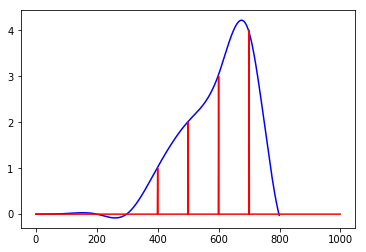

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import lfilter

x = np.array([0,0,1,2,3,4,0,0])
z1=-0.26795

p=lfilter( [1.],[1., -z1], x,axis=0)


c=-6*z1*np.fliplr([lfilter([1.],[1.,-z1], (p[::-1]))])[0];
h1=np.ones((100));
h2=sig.convolve(h1,h1)/100;
h4=sig.convolve(h2,h2)/100;

print(len(h4))


c_upsampled=np.zeros(100*len(c))
c_upsampled[::100]=c
xi=lfilter(h4,1,c_upsampled);

plt.plot(xi,color='blue');
# define xu
xu=np.zeros((np.shape(c_upsampled)))
xu[::100]=x
xu=np.concatenate((np.zeros(200),xu))
#print(np.shape(aa))
plt.plot(xu,color='red')